# Unsupervised learning: Iris clustering

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


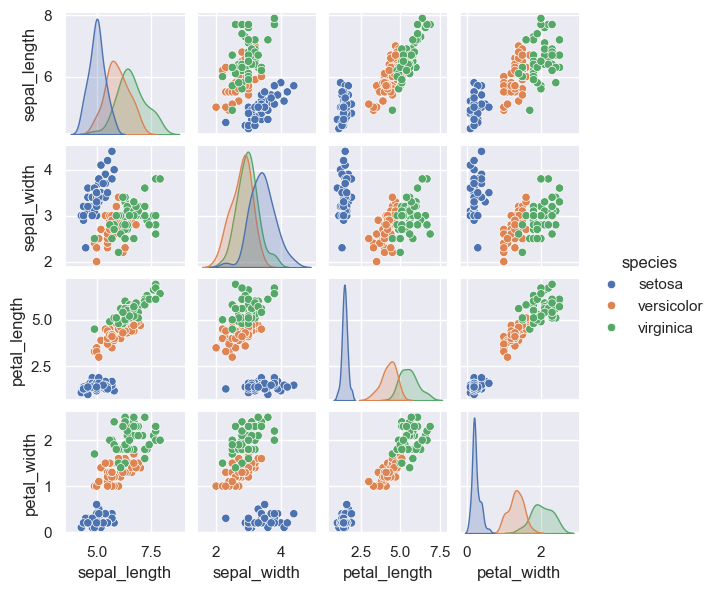

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [3]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [4]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

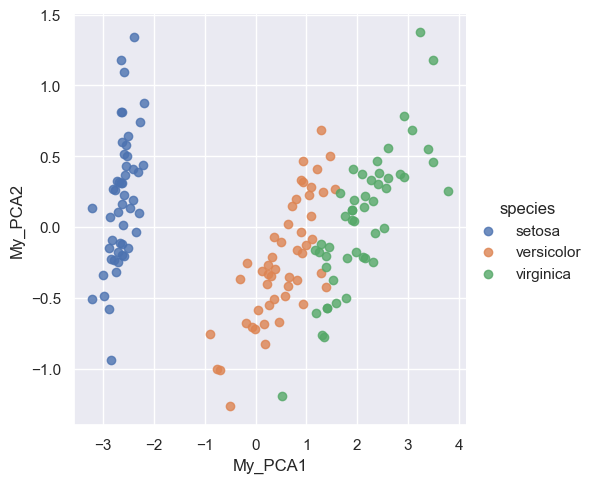

In [8]:
iris['My_PCA1'] = X_2D[:, 0]
iris['My_PCA2'] = X_2D[:, 1]
sns.lmplot(x="My_PCA1", y="My_PCA2", hue='species', data=iris, fit_reg=False)



Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in In Depth: Gaussian Mixture Models. A GMM attempts to model the data as a collection of Gaussian blobs.

In [14]:
from sklearn.mixture import GaussianMixture  # Importa GaussianMixture en lugar de GMM

model = GaussianMixture(n_components=3, covariance_type='full')  # Instancia el modelo con los hiperparámetros
model.fit(X_iris)  # Ajusta el modelo a los datos. ¡Observa que y no se especifica!


GaussianMixture(n_components=3)

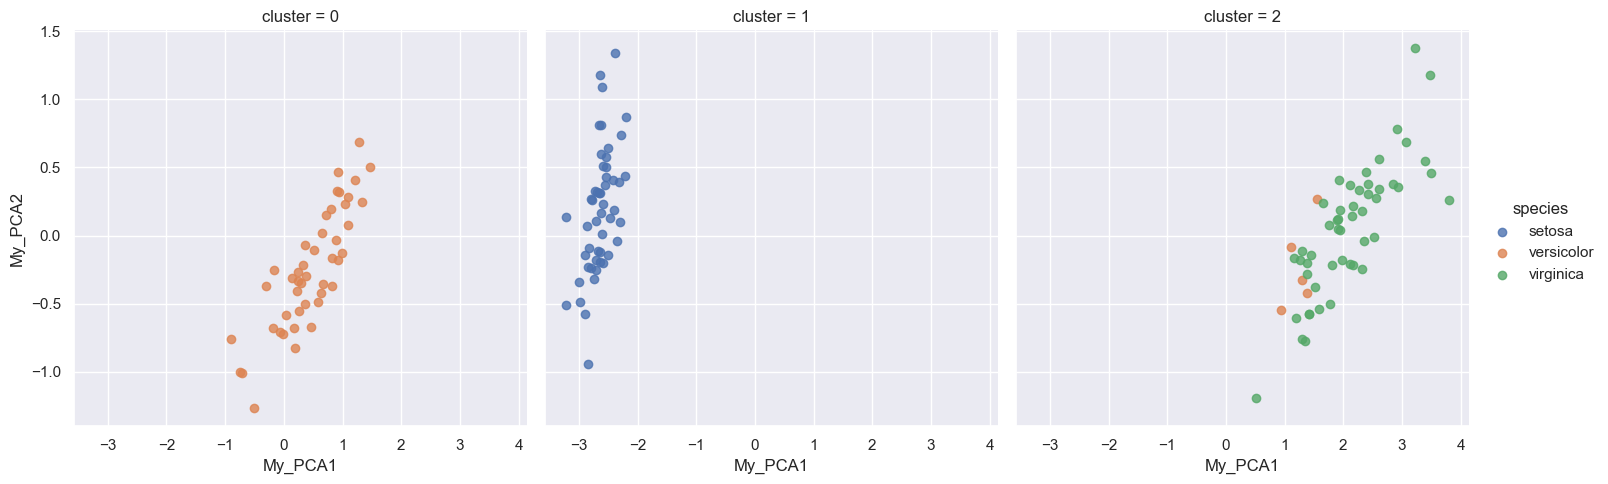

In [15]:
y_gmm = model.predict(X_iris)  # Determina las etiquetas de los clusters
iris['cluster'] = y_gmm
sns.lmplot(x="My_PCA1", y="My_PCA2", data=iris, hue='species', col='cluster', fit_reg=False)